<a href="https://colab.research.google.com/github/gianpDomiziani/TinyML/blob/main/tf_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
v1 = tf.Variable(initial_value=np.zeros(shape=[3, 3]), name='v1', dtype='float32')
v1

<tf.Variable 'v1:0' shape=(3, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
v2 = v1[0,2].assign(1)
v2

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
rv_tensor = tf.keras.initializers.RandomNormal()(shape=[3,3])
rv_v0 = tf.Variable(rv_tensor, name='random variable', dtype='float32')

In [ ]:
x = np.random.normal(size=[1,4]).astype('float32')

init = tf.keras.initializers.RandomNormal()
                                            
w1 = tf.Variable(init(shape=[4,3]))
b1 = tf.Variable(init(shape=[1,3]))

w2 = tf.Variable(init(shape=[3,2]))
b2 = tf.Variable(init(shape=[1,2]))

@tf.function
def forward(x, W, b, act):
  return act(tf.matmul(x,W) + b)

h = forward(x, w1, b1, tf.nn.sigmoid)

y = forward(h, w2, b2, tf.nn.softmax)

y, x

(<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.5014091, 0.4985908]], dtype=float32)>,
 array([[ 0.9204785 , -0.19667673,  0.72073174,  0.12573273]],
       dtype=float32))

In [ ]:
tf.Variable(np.array([[1,2,3], [4,3,2]]), dtype='int16')

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int16, numpy=
array([[1, 2, 3],
       [4, 3, 2]], dtype=int16)>

In [ ]:
init = tf.keras.initializers.RandomNormal()

x1 = tf.Variable(init(shape=[4,1, 5]), dtype='float32', trainable=False)
x2 = tf.Variable(init(shape=[4,1, 5]), dtype='float32', trainable=False)

x1, x2

(<tf.Variable 'Variable:0' shape=(4, 1, 5) dtype=float32, numpy=
 array([[[-0.00917735,  0.0786454 , -0.02194308, -0.00963457,
           0.0452086 ]],
 
        [[ 0.03479133, -0.01781007, -0.06817723,  0.01144785,
          -0.05738797]],
 
        [[-0.01059543,  0.00711173, -0.09467124, -0.0300298 ,
           0.00888795]],
 
        [[-0.00461904, -0.07349711,  0.01251428,  0.00584011,
          -0.00526723]]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4, 1, 5) dtype=float32, numpy=
 array([[[ 0.00498307, -0.01179373, -0.01901756, -0.01404089,
           0.07401403]],
 
        [[ 0.04869639, -0.00419287, -0.05659168, -0.01352446,
          -0.06580733]],
 
        [[-0.00608923, -0.00781754,  0.08527572, -0.03071793,
           0.02568431]],
 
        [[-0.01859309,  0.00268516, -0.0080418 , -0.02147143,
          -0.00668501]]], dtype=float32)>)

In [ ]:
y = tf.constant(np.random.poisson(size=[4,1,5]), dtype='float32')
y

<tf.Tensor: shape=(4, 1, 5), dtype=float32, numpy=
array([[[1., 1., 2., 0., 0.]],

       [[0., 1., 3., 1., 0.]],

       [[1., 1., 5., 0., 2.]],

       [[2., 0., 2., 1., 4.]]], dtype=float32)>

In [ ]:
tf.reduce_prod(y, axis=0)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=array([[ 0.,  0., 60.,  0.,  0.]], dtype=float32)>

In [ ]:
tf.cumsum(y)

<tf.Tensor: shape=(4, 1, 5), dtype=float32, numpy=
array([[[ 1.,  1.,  2.,  0.,  0.]],

       [[ 1.,  2.,  5.,  1.,  0.]],

       [[ 2.,  3., 10.,  1.,  2.]],

       [[ 4.,  3., 12.,  2.,  6.]]], dtype=float32)>

In [ ]:
from PIL import Image

x_rgb = np.array(Image.open('baboon.jpg')).astype('float32')
x_rgb = tf.constant(x_rgb)
x_rgb.shape

grays = tf.constant(([[0.3], [0.59], [0.11]]))

x_gray = tf.matmul(x_rgb, grays)
x_gray.shape
x_gray = tf.squeeze(x_gray)
x_gray.shape

TensorShape([655, 900, 3])

TensorShape([655, 900, 1])

TensorShape([655, 900])

In [ ]:
y = tf.constant(x_gray)

filter = tf.Variable(np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]), dtype='float32')

output = tf.matmul(y, filter)

# Sobel operator
The sobel operator, allows to compute the gradient of an image. The gradient of an image take into account how much the intensity of an image is varying, along the x and y axes. The sobel operator, is defined by two filters:
$$ S_x = \begin{matrix} +1 & 0 & -1 \\
                  +2 & 0 & -2 \\
                  +1 & 0 & -1 \\
    \end{matrix}
$$ \\
$$ S_y = \begin{matrix} +1 & +2 & +1 \\
                  0 & 0 & 0 \\
                  -1 & -2 & -1 \\
    \end{matrix}
$$

The first one, allows to detect the horizonal lines, while the second ones the vertical lines. Indeed, you can note as the first one has the maximum variation on the rows (summing the columns gives zero), while, on the contrary, the second ones has the maximum variayion on the columns (summing the rows gives zero). Given a grayscale image, and its corresponding matrix A, its gradients is computed as follows:
$$
\mathbf(G_x) = S_x * A ; \mathbf(G_y) = S_y * A
$$ 
Where, the operation *, is the 2-D $\textit{convolutional}$ operators. 
At each pixel point, the gradient results can be combined to obtain the gradient magnitude:
$$
G = \sqrt(G_x^2 + G_y^2)
$$ 

and, therefore, the gradient's orientation (direction), is obtained as follows:

$$
\mathbf{\Theta} = \arctan(G_y / G_x) 
$$ 

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

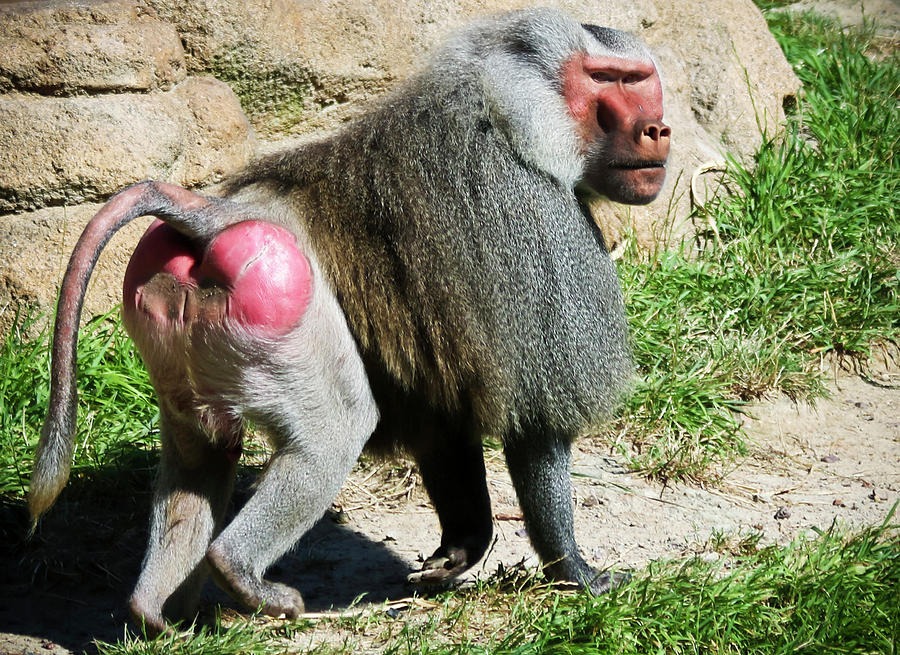

In [7]:
img = cv2.imread('baboon.jpg')
cv2_imshow(img)

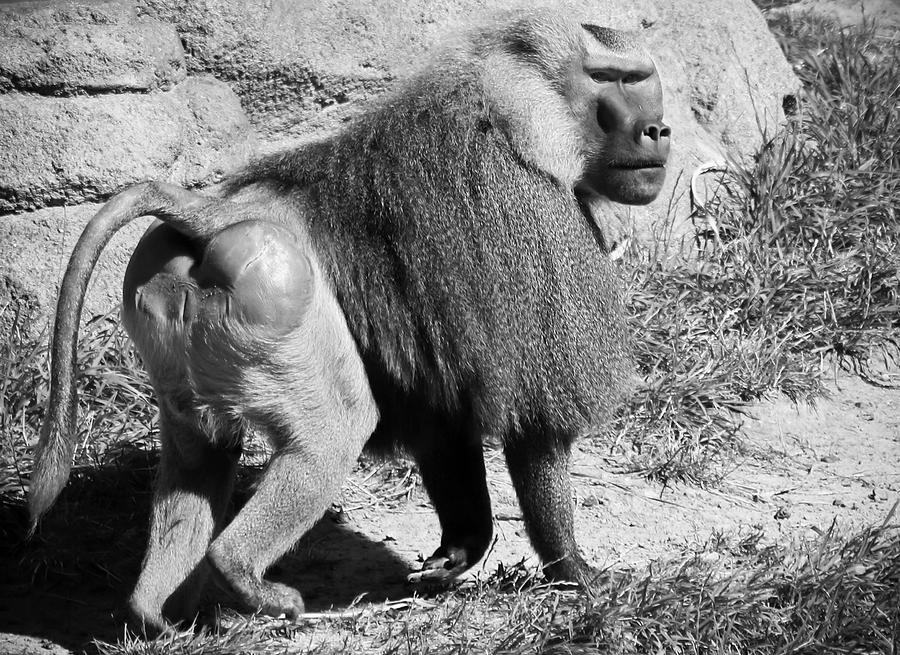

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [10]:
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
gX, gY

(array([[   0.,   12.,    6., ...,   -6.,   -6.,    0.],
        [   0.,   10.,    6., ...,   -9.,  -10.,    0.],
        [   0.,    6.,    9., ...,  -15.,  -19.,    0.],
        ...,
        [   0.,   57.,   48., ...,  254.,   55.,    0.],
        [   0.,  117.,  -64., ...,  180.,  -17.,    0.],
        [   0.,  112., -102., ...,  132.,  -66.,    0.]], dtype=float32),
 array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [  18.,   16.,   14., ...,   21.,   14.,   10.],
        [  40.,   38.,   39., ...,  -21.,  -29.,  -34.],
        ...,
        [-182., -117., -126., ...,  -28.,  -77., -100.],
        [ -58.,  -63., -106., ...,   20.,  -77., -126.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]], dtype=float32))

In [11]:
# convert the results into a uint8 type, for further opencv computations
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)
gX

array([[  0,  12,   6, ...,   6,   6,   0],
       [  0,  10,   6, ...,   9,  10,   0],
       [  0,   6,   9, ...,  15,  19,   0],
       ...,
       [  0,  57,  48, ..., 254,  55,   0],
       [  0, 117,  64, ..., 180,  17,   0],
       [  0, 112, 102, ..., 132,  66,   0]], dtype=uint8)

In [12]:
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

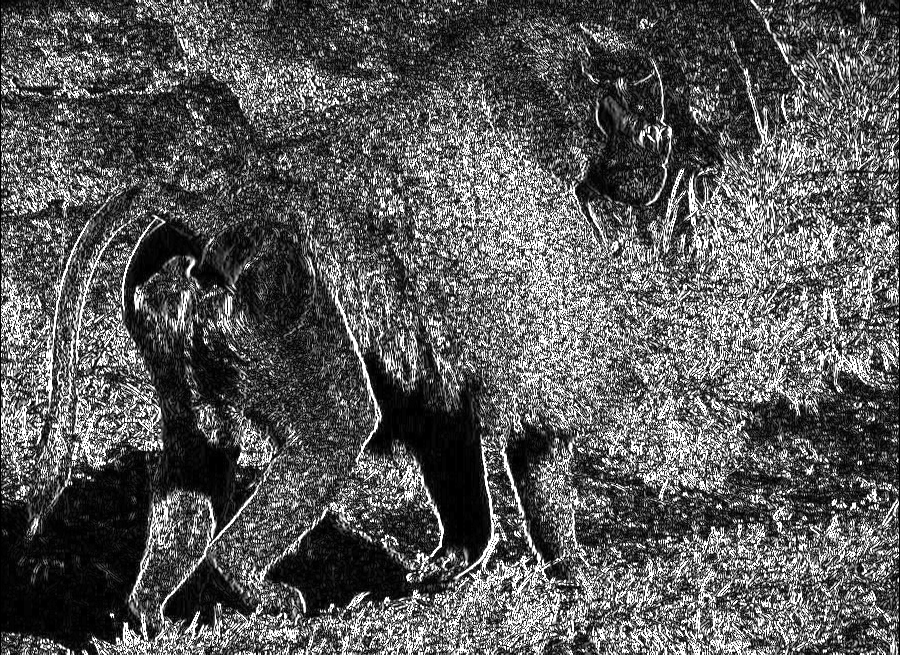

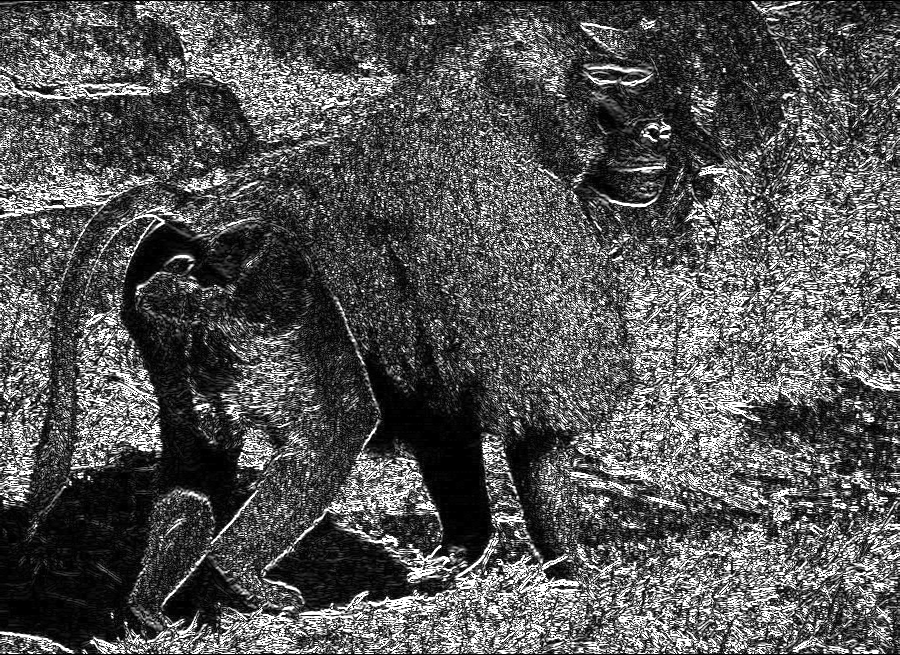

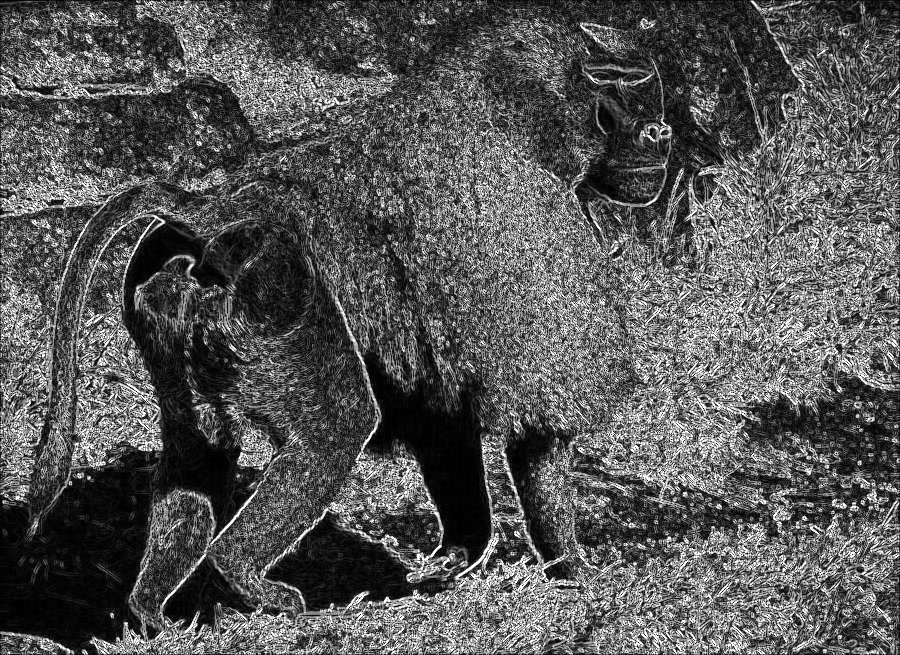

In [13]:
cv2_imshow(gX)
cv2_imshow(gY)
cv2_imshow(combined)

In [22]:
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

In [23]:
magnitude = np.sqrt(np.add(np.square(gX), np.square(gY)))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

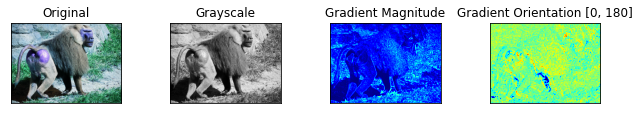

In [31]:
(fig, axs) = plt.subplots(nrows=1, ncols=4, figsize=(9, 5))
# plot each of the images
axs[0].imshow(img)
axs[1].imshow(gray, cmap="gray")
axs[2].imshow(magnitude, cmap="jet")
axs[3].imshow(orientation, cmap="jet")
# set the titles of each axes
axs[0].set_title('Original')
axs[1].set_title("Grayscale")
axs[2].set_title("Gradient Magnitude")
axs[3].set_title("Gradient Orientation [0, 180]")
# loop over each of the axes and turn off the x and y ticks
for i in range(0, 4):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()